Import Library

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

Data Loading

In [176]:
kidney = pd.read_csv('kidney_disease.csv', index_col='id')
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [177]:
kidney.isna().sum().sort_values(ascending=False)

rbc               152
rc                130
wc                105
pot                88
sod                87
pcv                70
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [178]:
kidney.duplicated().sum()

0

In [179]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


Data Rectification

In [180]:
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
kidney.rename(columns=col, inplace=True)
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd


In [181]:
kidney['packed_cell_volume']     = pd.to_numeric(kidney['packed_cell_volume'], errors='coerce')
kidney['white_blood_cell_count'] = pd.to_numeric(kidney['white_blood_cell_count'], errors='coerce')
kidney['red_blood_cell_count']   = pd.to_numeric(kidney['red_blood_cell_count'], errors='coerce')

In [182]:
for col in kidney.columns:
    print(f'{col} has {kidney[col].nunique()} values')

age has 76 values
blood_pressure has 10 values
specific_gravity has 5 values
albumin has 6 values
sugar has 6 values
red_blood_cells has 2 values
pus_cell has 2 values
pus_cell_clumps has 2 values
bacteria has 2 values
blood_glucose_random has 146 values
blood_urea has 118 values
serum_creatinine has 84 values
sodium has 34 values
potassium has 40 values
hemoglobin has 115 values
packed_cell_volume has 42 values
white_blood_cell_count has 89 values
red_blood_cell_count has 45 values
hypertension has 2 values
diabetes_mellitus has 5 values
coronary_artery_disease has 3 values
appetite has 2 values
pedal_edema has 2 values
anemia has 2 values
class has 3 values


In [183]:
cat_cols = [col for col in kidney.columns if kidney[col].dtype=='object']
num_cols = [col for col in kidney.columns if kidney[col].dtype!='object']

In [184]:
len(cat_cols)

11

In [185]:
len(num_cols)

14

In [186]:
for col in cat_cols:
    print(f'{col} has {kidney[col].unique()} values')

red_blood_cells has [nan 'normal' 'abnormal'] values
pus_cell has ['normal' 'abnormal' nan] values
pus_cell_clumps has ['notpresent' 'present' nan] values
bacteria has ['notpresent' 'present' nan] values
hypertension has ['yes' 'no' nan] values
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values
coronary_artery_disease has ['no' 'yes' '\tno' nan] values
appetite has ['good' 'poor' nan] values
pedal_edema has ['no' 'yes' nan] values
anemia has ['no' 'yes' nan] values
class has ['ckd' 'ckd\t' 'notckd'] values


In [187]:
kidney['diabetes_mellitus'].replace(to_replace={'\tno':'no',
                                            '\tyes':'yes',
                                            ' yes':'yes'},
                                inplace=True)
kidney['coronary_artery_disease'].replace(to_replace={'\tno':'no'},
                                      inplace=True)
kidney['class'].replace(to_replace={'ckd\t':'ckd',
                                'notckd':'not ckd'},
                    inplace=True)

In [188]:
kidney['class'] = kidney['class'].map({'ckd':0, 'not ckd':1})
kidney['class'] = pd.to_numeric(kidney['class'], errors='coerce')

In [189]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f'{col} has {kidney[col].unique()} values')

diabetes_mellitus has ['yes' 'no' nan] values
coronary_artery_disease has ['no' 'yes' nan] values
class has [0 1] values


In [190]:
for col in num_cols:
    print(f'{col} has {kidney[col].unique()} values')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] values
blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] values
specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] values
albumin has [ 1.  4.  2.  3.  0. nan  5.] values
sugar has [ 0.  3.  4.  1. nan  2.  5.] values
blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 115.  89. 297. 

In [191]:
kidney

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1


EDA

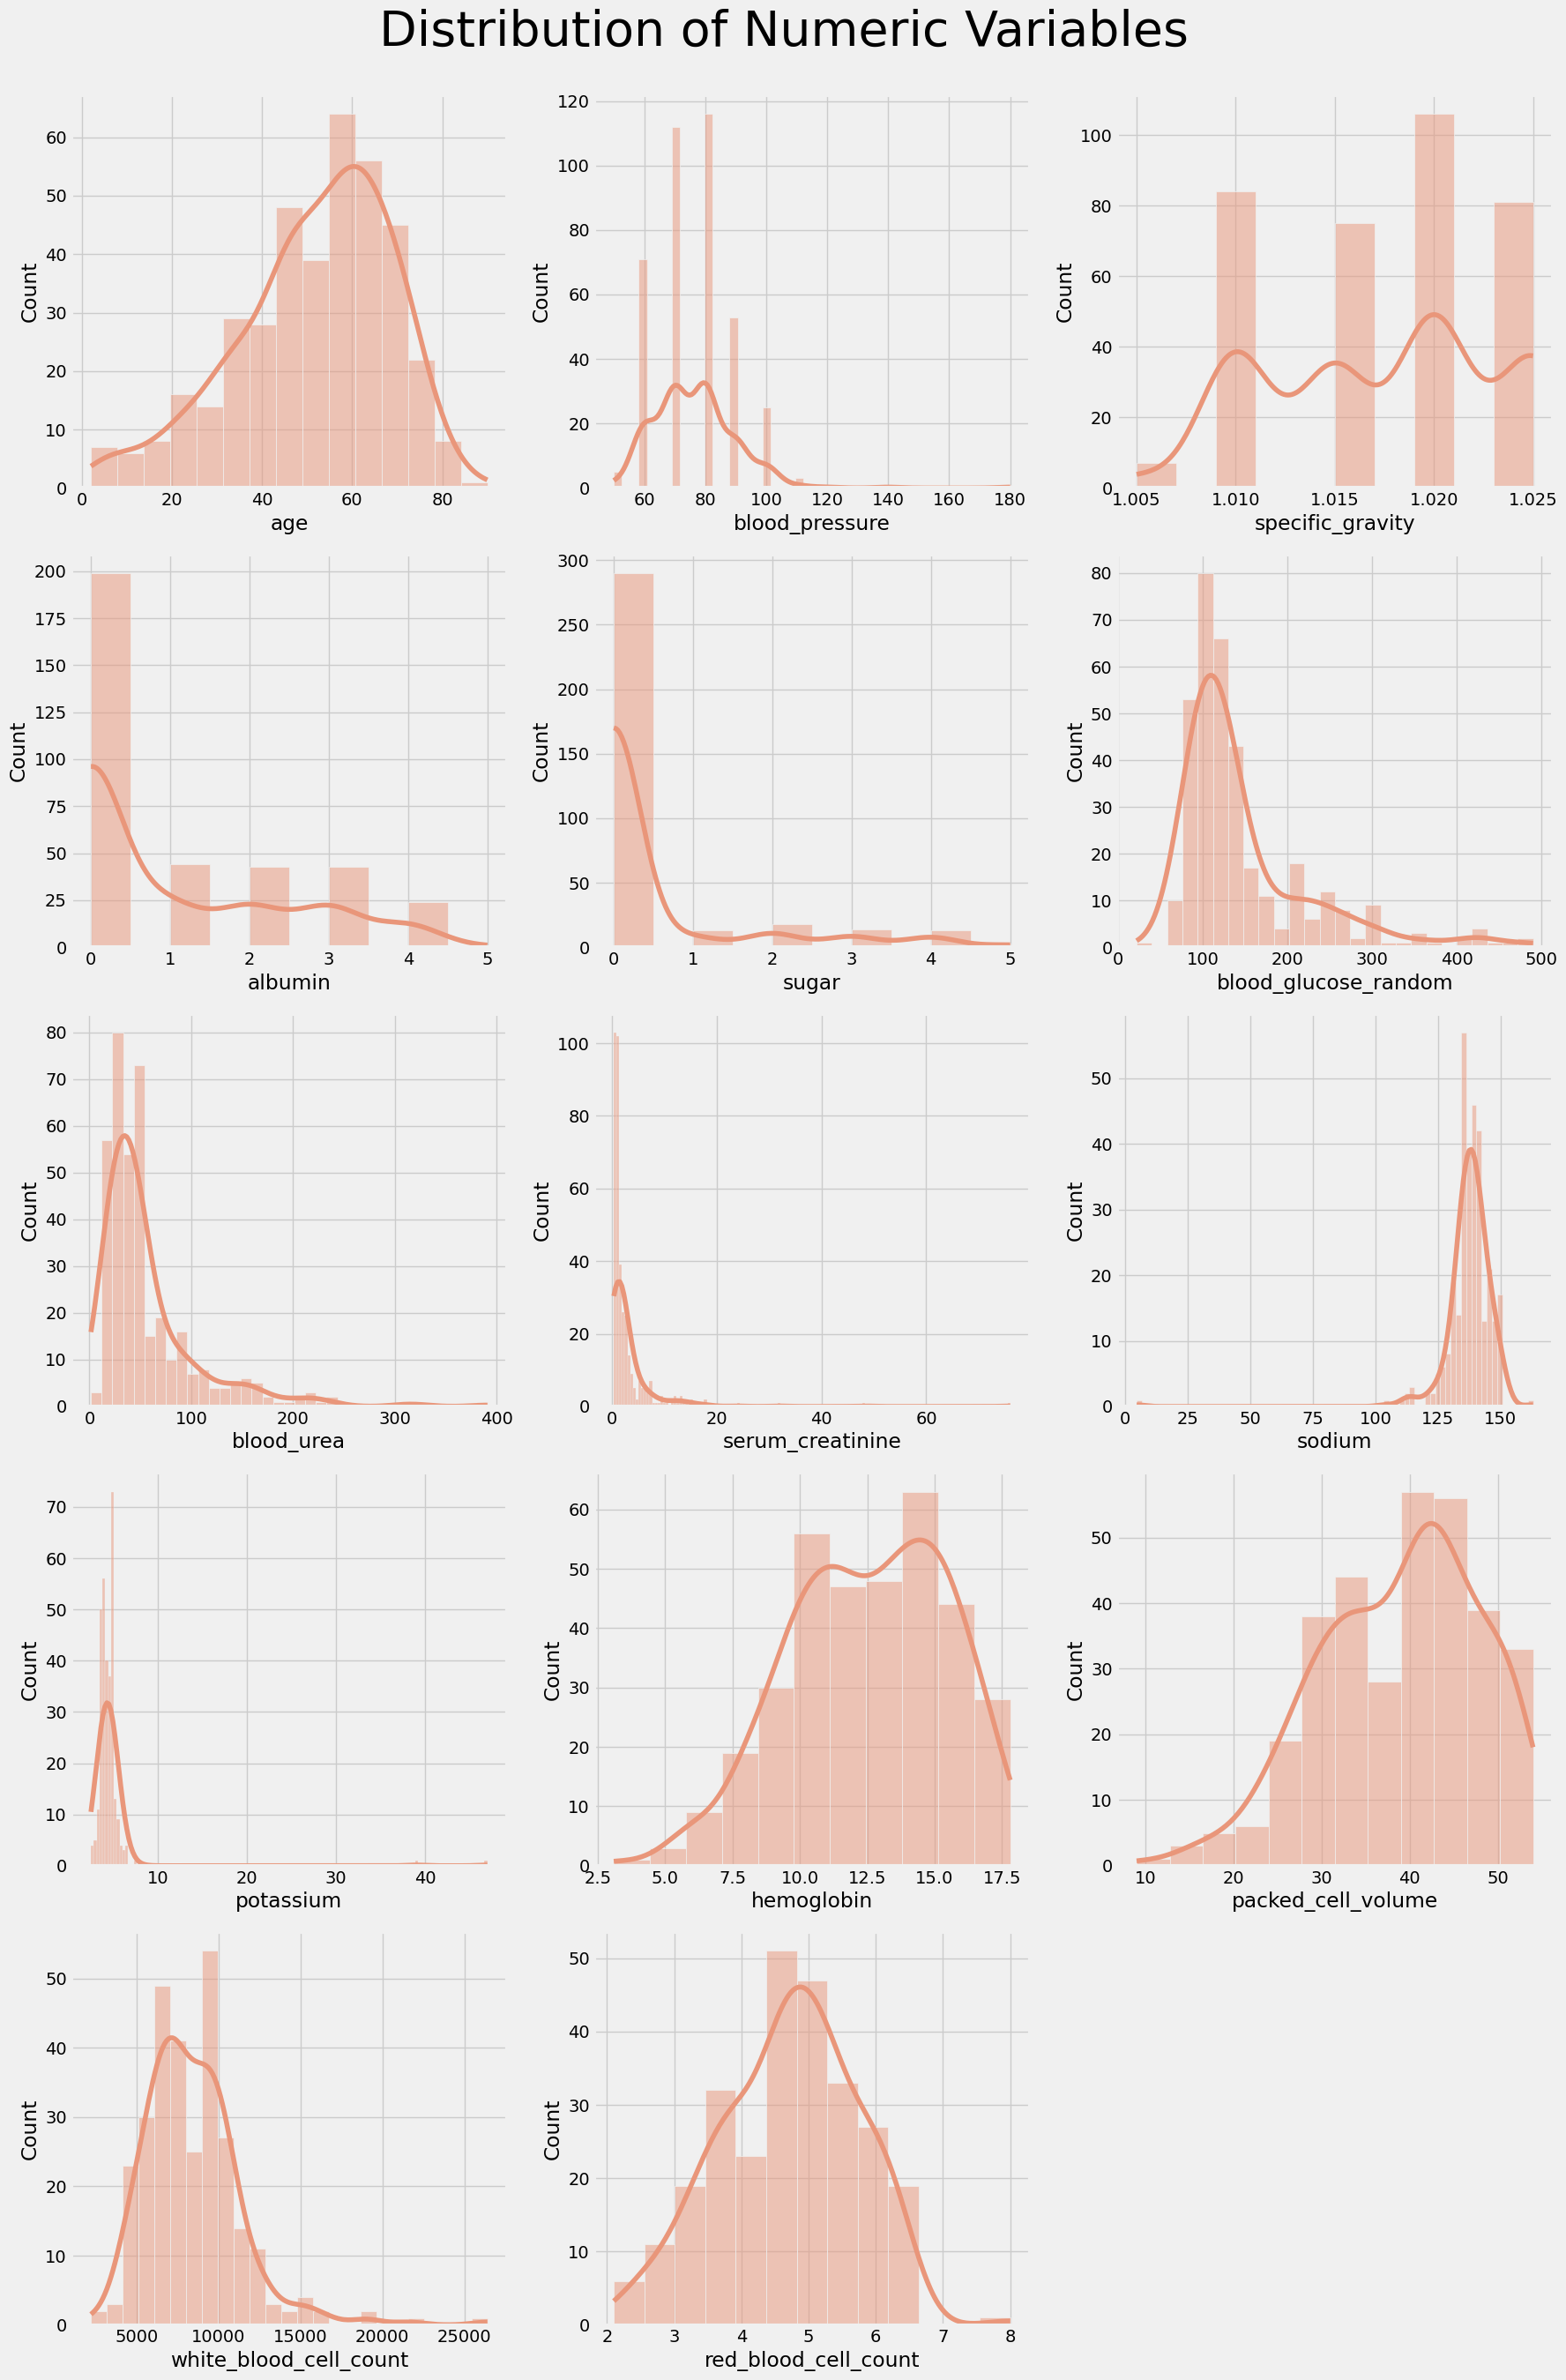

In [192]:
plt.figure(figsize=(18, 27))
plotnumber = 1

for col in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(5, 3, plotnumber)
        sns.histplot(x=kidney[col], kde=True, color='darksalmon')
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Numeric Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

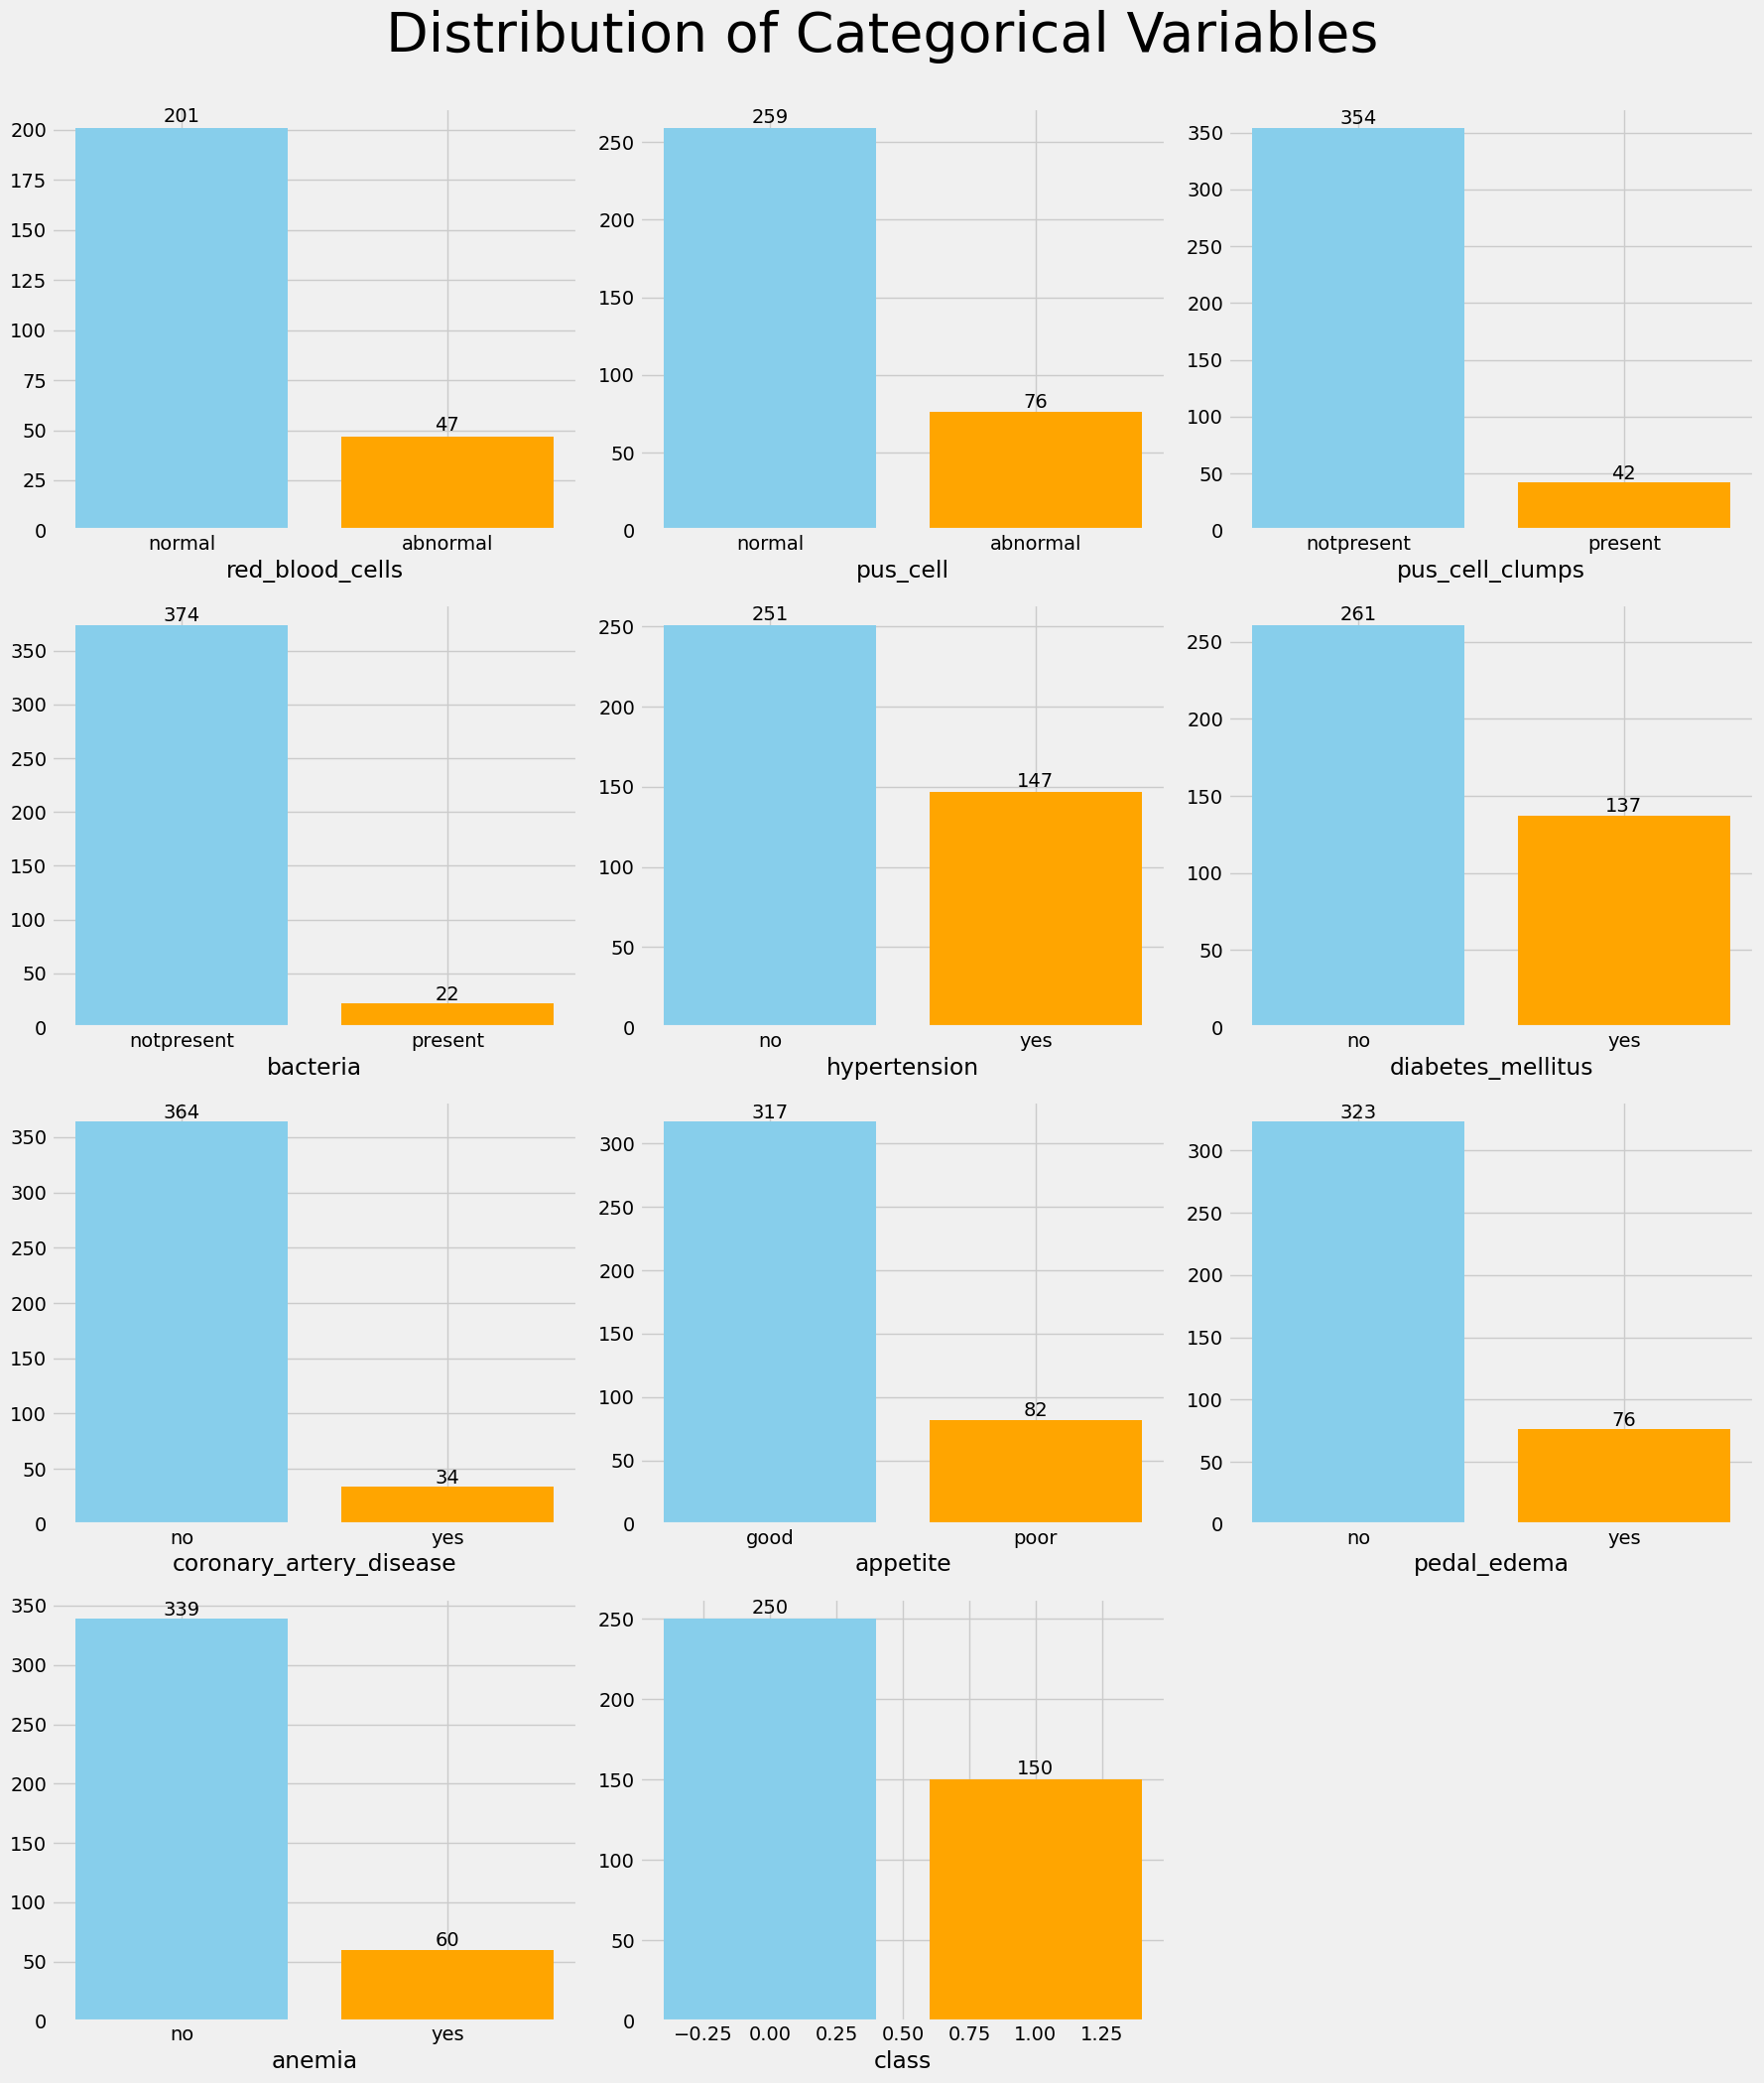

In [193]:
plt.figure(figsize=(18, 21))
plotnumber = 1

colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'lightcoral', 'cyan', 'pink']

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        counts = kidney[col].value_counts()
        ax.bar(counts.index, counts.values, color=colors[:len(counts)])
    
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{p.get_height()}', ha="center")
        
        plt.xlabel(col)
        
    plotnumber += 1

plt.suptitle('Distribution of Categorical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

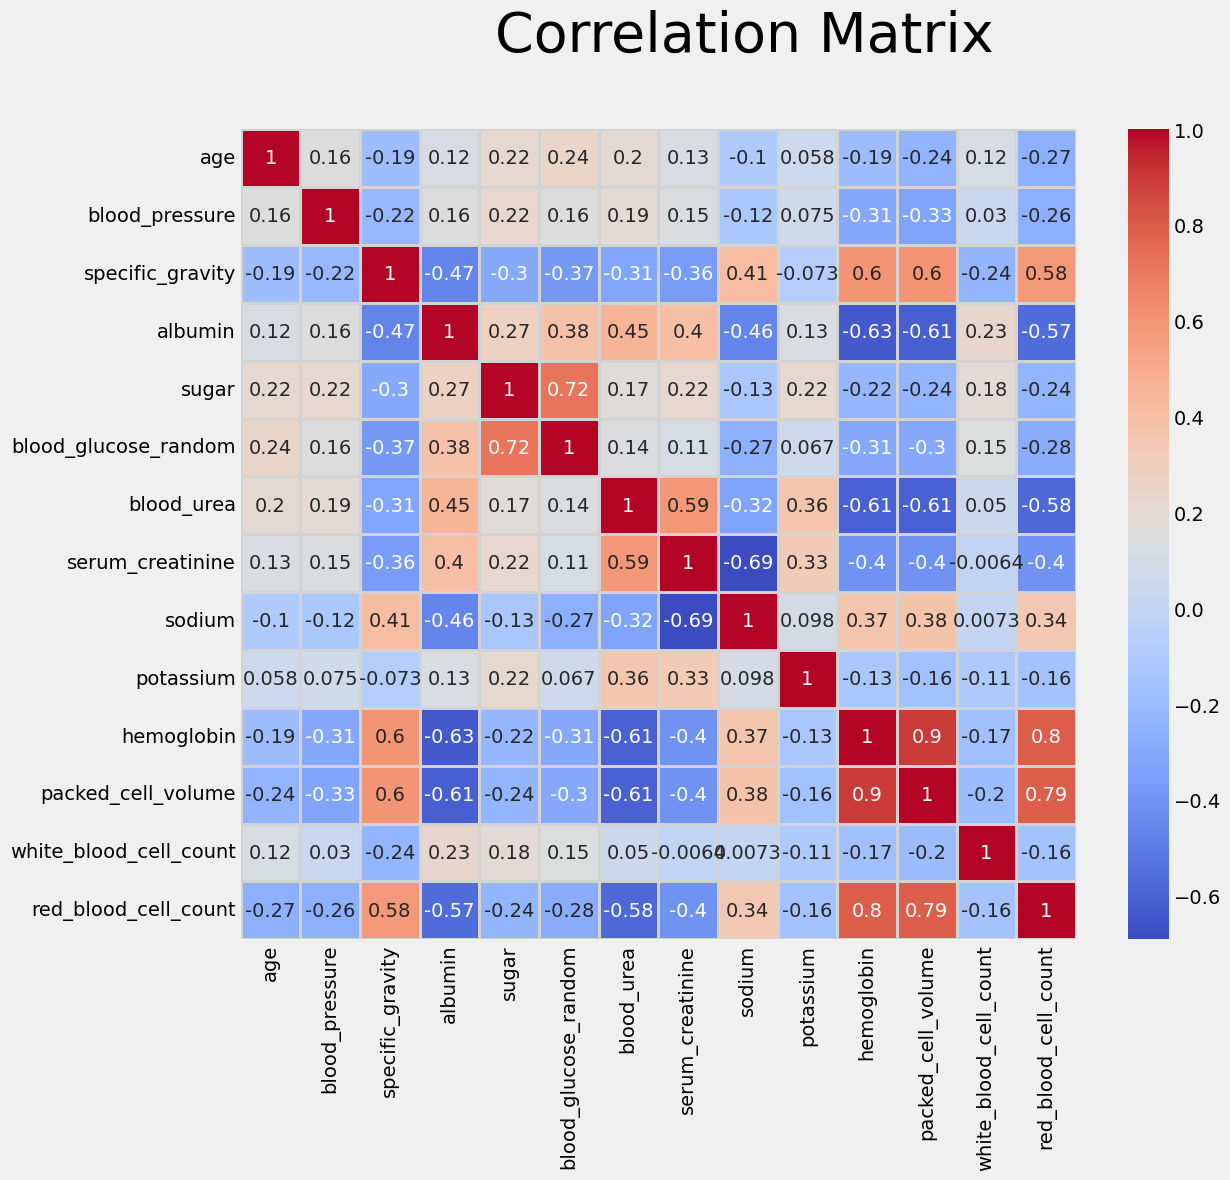

In [194]:
num_kidney = kidney[num_cols]

plt.figure(figsize=(12, 10))
sns.heatmap(num_kidney.corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Correlation Matrix', fontsize=40, y=1)
plt.show()

Missing Data Imputation

In [195]:
kidney[num_cols].isnull().sum().sort_values(ascending=False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
hemoglobin                 52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [196]:
kidney[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [197]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0, max_iter=10, sample_posterior=True)

kidney[num_cols] = imputer.fit_transform(kidney[num_cols])

In [198]:
kidney[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [199]:
def random_value_imputation(feature):
    random_sample = kidney[feature].dropna().sample(kidney[feature].isna().sum())
    random_sample.index = kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = kidney[feature].mode()[0]
    kidney[feature] = kidney[feature].fillna(mode)
    
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [200]:
kidney[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

Modelling

In [201]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    kidney[col] = le.fit_transform(kidney[col])

In [202]:
ind_col = [col for col in kidney.columns if col!='class']
# Define dependent variable
dep_col = 'class'

X = kidney[ind_col]
y = kidney[dep_col]

# For later use in feature importance plotting
dataframe = X

In [203]:
from sklearn.preprocessing import StandardScaler

# Features normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [204]:
from sklearn.model_selection import train_test_split

# Divide the data set into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [205]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    # Print the evaluation metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")
    
    # Return the metrics as a dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

In [206]:
from sklearn.svm import SVC

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [207]:
model_name = 'Support Vector Machine'
svm_results = evaluate_model(model, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Support Vector Machine: 0.99000

Confusion Matrix:
[[127   1]
 [  0  72]]

Test Accuracy of Support Vector Machine: 0.99500
Test Precision of Support Vector Machine: 0.99315
Test Recall of Support Vector Machine: 0.99609
Test F1 Score of Support Vector Machine: 0.99459

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      0.99        72

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [208]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Akurasi Data Training = ', training_data_accuracy)

Akurasi Data Training =  0.99


In [209]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Akurasi Data Test = ', test_data_accuracy)

Akurasi Data Test =  0.995


Testing Model

In [210]:
input_data = (45.0,70.0,1.025,2.0,0.0,1,0,1,0,117.0,52.0,2.2,136.0,3.8,10.0,30,19100,3.7,0,0,0,1,0,0)

numpy_array = np.array(input_data)

data_reshape = numpy_array.reshape(1,-1)

std_data = scaler.transform(data_reshape)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
    print('Pasien Tidak Terkena Ginjal Kronis')
else:
    print('Pasien Terkena Ginjal Kronis')
    

[0]
Pasien Terkena Ginjal Kronis


Import Model

In [211]:
import pickle

file_name = 'kidney_model.sav'
pickle.dump(model, open(file_name, 'wb'))